# ANÁLISIS EXPLORATORIO DE DATOS

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [2]:
eda = pd.read_csv('Wine_reviews_climate_prediction.csv')

In [3]:
eda.head(2)

Unnamed: 0   country                                        description  \
0           0  Portugal  This is ripe and fruity a wine that is smooth ...   
1           1  Portugal  Strong tannins dominate this wine. It comes fr...   

   points  price taster_name         variety               winery  Year  \
0      87   15.0  Roger Voss  Portuguese Red  Quinta dos Avidagos  2011   
1      85    NaN  Roger Voss  Portuguese Red     Quinta do Filoco  2011   

  region   Latitude  Longitude  Lat_x  Long_x  temp_anual  temp_max_anual  \
0  Douro  41.453397  -5.125201  41.25   -5.25        13.1            19.7   
1  Douro  41.453397  -5.125201  41.25   -5.25        13.1            19.7   

   temp_min_anual  pre_anual  etp_anual  
0            6.57      298.7       1206  
1            6.57      298.7       1206

In [4]:
eda.drop(columns = 'Unnamed: 0', inplace = True)

In [5]:
eda.describe()

points         price          Year      Latitude     Longitude  \
count  65838.000000  60311.000000  65838.000000  65838.000000  65838.000000   
mean      88.352897     37.008655   2009.080956     32.945216    -38.770990   
std        3.161727     42.113959      2.616905     24.915822     67.148066   
min       80.000000      4.000000   2000.000000    -45.129986   -124.764732   
25%       86.000000     18.000000   2007.000000     37.123224   -118.339346   
50%       88.000000     28.000000   2010.000000     41.213798     -6.047443   
75%       91.000000     45.000000   2011.000000     45.344425      7.942845   
max      100.000000   2500.000000   2012.000000     59.941208    178.356201   

              Lat_x        Long_x    temp_anual  temp_max_anual  \
count  65838.000000  65838.000000  65838.000000    65838.000000   
mean      32.974764    -38.782542     12.944409       18.396368   
std       24.929384     67.147257      3.551747        3.868834   
min      -45.250000   -124.750000     -0.630000        1.990000   
25%       37.250000   -118.250000     10.980000       16.150000   
50%       41.250000     -6.250000     13.280000       18.340000   
75%       45.250000      7.750000     14.480000       20.530000   
max       59.750000    178.250000     28.650000       34.900000   

       temp_min_anual     pre_anual     etp_anual  
count    65838.000000  65838.000000  65838.000000  
mean         7.535872    820.700068   1013.109040  
std          3.749604    402.676102    232.051532  
min         -6.620000      0.000000    351.000000  
25%          5.830000    573.400000    864.000000  
50%          7.200000    758.500000   1008.000000  
75%          9.590000    992.600000   1176.000000  
max         24.310000   4114.000000   2370.000000

In [6]:
eda.price.median()

28.0

In [7]:
eda.quantile([0.25, 0.5, 0.75, 0.90, 0.95, 0.99, 0.999]).T

0.250        0.500        0.750        0.900  \
points            86.000000    88.000000    91.000000    93.000000   
price             18.000000    28.000000    45.000000    69.000000   
Year            2007.000000  2010.000000  2011.000000  2012.000000   
Latitude          37.123224    41.213798    45.344425    48.046335   
Longitude       -118.339346    -6.047443     7.942845    14.958644   
Lat_x             37.250000    41.250000    45.250000    48.250000   
Long_x          -118.250000    -6.250000     7.750000    14.750000   
temp_anual        10.980000    13.280000    14.480000    16.410000   
temp_max_anual    16.150000    18.340000    20.530000    22.410000   
temp_min_anual     5.830000     7.200000     9.590000    11.590000   
pre_anual        573.400000   758.500000   992.600000  1292.200000   
etp_anual        864.000000  1008.000000  1176.000000  1257.000000   

                      0.950        0.990        0.999  
points            94.000000    95.000000    98.000000  
price             90.000000   160.000000   492.210000  
Year            2012.000000  2012.000000  2012.000000  
Latitude          49.354905    53.139881    54.653801  
Longitude         28.177500   151.312067   175.088401  
Lat_x             49.250000    53.250000    54.750000  
Long_x            28.250000   151.250000   175.250000  
temp_anual        18.100000    26.380000    28.210000  
temp_max_anual    24.300000    31.388900    34.400000  
temp_min_anual    13.230000    22.070000    23.240000  
pre_anual       1485.945000  2268.500000  3225.728700  
etp_anual       1332.000000  1740.000000  2175.000000

In [8]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65838 entries, 0 to 65837
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         65838 non-null  object 
 1   description     65838 non-null  object 
 2   points          65838 non-null  int64  
 3   price           60311 non-null  float64
 4   taster_name     65838 non-null  object 
 5   variety         65838 non-null  object 
 6   winery          65838 non-null  object 
 7   Year            65838 non-null  int64  
 8   region          65838 non-null  object 
 9   Latitude        65838 non-null  float64
 10  Longitude       65838 non-null  float64
 11  Lat_x           65838 non-null  float64
 12  Long_x          65838 non-null  float64
 13  temp_anual      65838 non-null  float64
 14  temp_max_anual  65838 non-null  float64
 15  temp_min_anual  65838 non-null  float64
 16  pre_anual       65838 non-null  float64
 17  etp_anual       65838 non-null 

In [9]:
eda.price.quantile([0.25, 0.5, 0.75, 0.90, 0.95, 0.99, 0.999])

0.250     18.00
0.500     28.00
0.750     45.00
0.900     69.00
0.950     90.00
0.990    160.00
0.999    492.21
Name: price, dtype: float64

In [10]:
plt.style.use('seaborn')

sns.displot(eda.price, bins = 100);
plt.xlim(0,160)

AttributeError: module 'seaborn' has no attribute 'displot'

In [11]:
#El 99% de los datos los tenemos con un precio inferior a $160

In [12]:
eda.points.quantile([0.25, 0.5, 0.75, 0.90, 0.95, 0.99, 0.999, 0.99999])

0.25000     86.0
0.50000     88.0
0.75000     91.0
0.90000     93.0
0.95000     94.0
0.99000     95.0
0.99900     98.0
0.99999    100.0
Name: points, dtype: float64

In [13]:
sns.displot(eda.points, bins = 100);
plt.xlim(70,110)

AttributeError: module 'seaborn' has no attribute 'displot'

In [14]:
rango = eda.loc[eda['points']>=95]
rango.describe()

points        price         Year     Latitude    Longitude  \
count  1359.000000  1208.000000  1359.000000  1359.000000  1359.000000   
mean     95.644592   143.312914  2008.884474    40.716962   -29.150944   
std       1.040186   183.481180     2.503438    14.458332    63.132669   
min      95.000000    20.000000  2000.000000   -35.217262  -123.430534   
25%      95.000000    62.000000  2007.000000    39.115829   -89.642979   
50%      95.000000    88.000000  2009.000000    44.449500    -0.672885   
75%      96.000000   144.250000  2011.000000    46.066728     7.942845   
max     100.000000  2500.000000  2012.000000    59.941208   151.312067   

             Lat_x       Long_x   temp_anual  temp_max_anual  temp_min_anual  \
count  1359.000000  1359.000000  1359.000000     1359.000000     1359.000000   
mean     40.740434   -29.183039    12.750574       17.870243        7.675092   
std      14.469901    63.127681     3.010442        3.244359        3.231913   
min     -35.250000  -123.250000     1.770000        4.650000       -4.320000   
25%      39.250000   -89.750000    11.020000       15.910000        5.995000   
50%      44.250000    -0.750000    13.350000       17.950000        7.240000   
75%      46.250000     7.750000    14.140000       19.190000        9.670000   
max      59.750000   151.250000    27.490000       31.900000       23.240000   

         pre_anual    etp_anual  
count  1359.000000  1359.000000  
mean    831.034805   965.567329  
std     330.517360   202.175443  
min     122.600000   393.000000  
25%     629.200000   828.000000  
50%     791.800000   930.000000  
75%     932.700000  1131.000000  
max    2560.700000  2016.000000

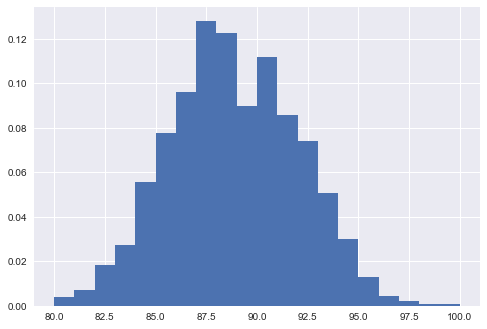

In [15]:
plt.figure()
plt.hist(eda['points'], bins = 20, density=True);


#sns.kdeplot(eda.points);

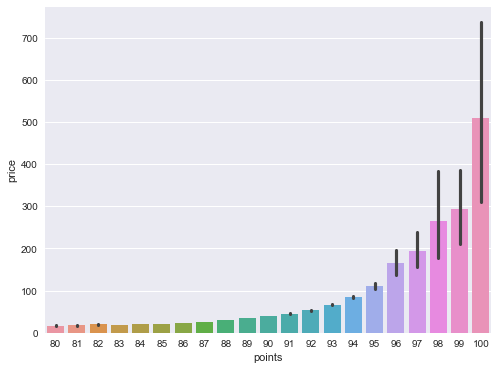

In [16]:
#barplot
plt.figure(figsize=(8, 6))
sns.barplot(eda.points,eda.price, data=eda)
#plt.xlabel("Points", size=14)
#plt.ylabel("LifeExp", size=14)

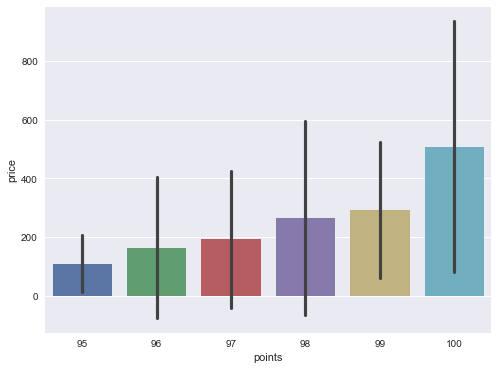

In [17]:
plt.figure(figsize=(8, 6))
sns.barplot(rango.points,rango.price, ci=  'sd', data=rango)

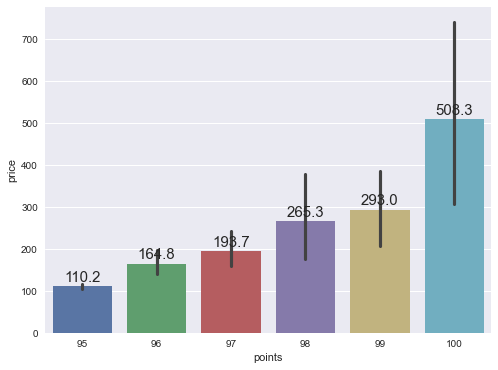

In [18]:
plt.figure(figsize=(8, 6))
splot = sns.barplot(rango.points,rango.price, data=rango)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [19]:
sns.set_theme(style="whitegrid")
#tips = sns.load_dataset("tips")
ax = sns.boxenplot(x=eda["points"])

AttributeError: module 'seaborn' has no attribute 'set_theme'

In [ ]:
pricex = sns.boxenplot(x=eda["price"])

In [ ]:
sns.distplot(eda.Year)

In [ ]:
plot_data = eda.groupby('country').filter(lambda x : len(x)>10)
Appellation_Reg = sns.countplot(y="country",
                                data=plot_data, palette="PuBuGn_d", order = plot_data['country'].value_counts().index);
Appellation_Reg.set(ylabel='country')

In [ ]:
Appellation_Reg = sns.countplot(y="taster_name",  
data=eda, palette="PuBuGn_d");  
Appellation_Reg.set(ylabel='taster_name') 

In [ ]:
corrMatrix = eda.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
corrMatrix

In [ ]:
#pd.plotting.scatter_matrix(eda, alpha = 0.3, figsize = (15,15), diagonal = 'kde');

In [ ]:
sns.distplot(eda.Latitude)

In [ ]:
sns.distplot(eda.Longitude)

In [ ]:
sns.distplot(eda.temp_anual)

In [ ]:
sns.distplot(eda.temp_max_anual)

In [ ]:
sns.distplot(eda.temp_min_anual)

In [ ]:
sns.distplot(eda.etp_anual)

In [ ]:
plt.style.use('seaborn-whitegrid')

In [ ]:
#relacionar poins/price contra latitud y longitud. Cada 2

In [ ]:
plt.figure()
plt.scatter(X_Latitude, Y_price)

In [ ]:
plt.hist(eda['price'], bins=40, range =(0,200) )#,  density=True)

In [ ]:
import matplotlib.gridspec as gridspec
plt.figure()
gridspec_ = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gridspec_[0, 1:])
side_histogram = plt.subplot(gridspec_[1:, 0])
lower_right = plt.subplot(gridspec_[1:, 1:])

#PRICE VS LONGITUDE
Y_price = eda['price']
X_Longitude = eda['Longitude']

lower_right.scatter(X_Longitude, Y_price)
top_histogram.hist(X_Longitude, bins=100)
s = side_histogram.hist(Y_price, bins=100, orientation='horizontal')

# clear the histograms and plot normed histograms
top_histogram.clear()
top_histogram.hist(X_Longitude, bins=100, density=True)
side_histogram.clear()
side_histogram.hist(Y_price, bins=100, range =(0,200), orientation='horizontal', density=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(140, 200)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(0, 150)

In [20]:
plt.figure()
gridspec_ = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gridspec_[0, 1:])
side_histogram = plt.subplot(gridspec_[1:, 0])
lower_right = plt.subplot(gridspec_[1:, 1:])

#PRICE VS LATITUDE
Y_price = eda['price']
X_Latitude = eda['Latitude']

lower_right.scatter(X_Latitude, Y_price)
top_histogram.hist(X_Latitude, bins=100)
s = side_histogram.hist(Y_points, bins=100, orientation='horizontal')

# clear the histograms and plot normed histograms
top_histogram.clear()
top_histogram.hist(X_Latitude, bins=100, density=True)
side_histogram.clear()
side_histogram.hist(Y_price, bins=100, range =(0,200), orientation='horizontal', density=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(-100, 200)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(0, 150)

NameError: name 'gridspec' is not defined

<Figure size 576x396 with 0 Axes>

In [21]:
plt.figure()
gridspec_ = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gridspec_[0, 1:])
side_histogram = plt.subplot(gridspec_[1:, 0])
lower_right = plt.subplot(gridspec_[1:, 1:])

#POINTS VS LONGITUDE
Y_points = eda['points']
X_Longitude = eda['Longitude']

lower_right.scatter(X_Longitude, Y_points)
top_histogram.hist(X_Longitude, bins=100)
s = side_histogram.hist(Y_points, bins=100, orientation='horizontal')

# clear the histograms and plot normed histograms
top_histogram.clear()
top_histogram.hist(X_Longitude, bins=100, density=True)
side_histogram.clear()
side_histogram.hist(Y_points, bins=100, range =(0,200), orientation='horizontal', density=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(-100, -50)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(0, 150)

NameError: name 'gridspec' is not defined

<Figure size 576x396 with 0 Axes>

In [22]:
plt.figure()
gridspec_ = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gridspec_[0, 1:])
side_histogram = plt.subplot(gridspec_[1:, 0])
lower_right = plt.subplot(gridspec_[1:, 1:])

#POINTS VS LATITUDE
Y_points = eda['points']
X_Latitude = eda['Latitude']

lower_right.scatter(X_Latitude, Y_points)
top_histogram.hist(X_Latitude, bins=100)
s = side_histogram.hist(Y_points, bins=100, orientation='horizontal')

# clear the histograms and plot normed histograms
top_histogram.clear()
top_histogram.hist(X_Latitude, bins=100, density=True)
side_histogram.clear()
side_histogram.hist(Y_points, bins=100, range =(0,200), orientation='horizontal', density=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(-20, 20)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(80, 100)

NameError: name 'gridspec' is not defined

<Figure size 576x396 with 0 Axes>

(array([1.580e+02, 3.400e+01, 5.300e+01, 1.120e+02, 1.600e+01, 7.000e+00,
        6.200e+01, 1.180e+02, 2.300e+02, 2.552e+03, 2.135e+03, 1.076e+03,
        3.500e+01, 2.000e+02, 9.900e+01, 4.300e+01, 3.000e+00, 2.000e+00,
        2.330e+02, 5.700e+01, 2.400e+01, 5.000e+00, 0.000e+00, 1.520e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.100e+01,
        3.900e+01, 1.900e+02, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 8.000e+00, 6.000e+00, 0.000e+00, 0.000e+00, 1.470e+02,
        0.000e+00, 5.130e+02, 0.000e+00, 0.000e+00, 8.200e+01, 1.300e+01,
        0.000e+00, 3.300e+01, 1.120e+02, 7.000e+00, 2.000e+00, 0.000e+00,
        6.300e+01, 2.000e+00, 9.700e+01, 1.240e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 2.020e+02, 0.000e+00, 7.000e+00, 3.000e+02, 2.460e+02,
        2.820e+02, 2.690e+02, 5.080e+02, 1.201e+03, 1.774e+03, 2.125e+03,
        3.085e+03, 7.045e+03, 2.415e+0

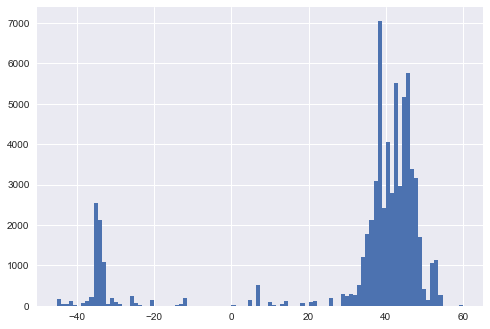

In [23]:
plt.hist(eda['Latitude'], bins=100)

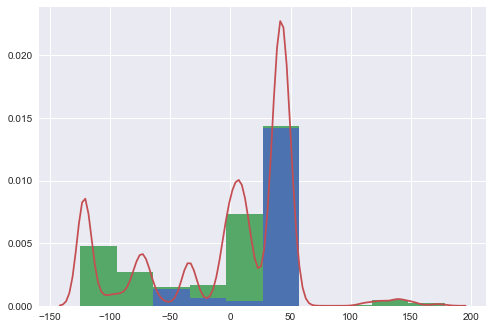

In [24]:
plt.figure()
plt.hist([eda.Latitude, eda.Longitude], histtype='barstacked', density=True);
v3 = np.concatenate(([eda.Latitude, eda.Longitude]))
sns.kdeplot(v3);

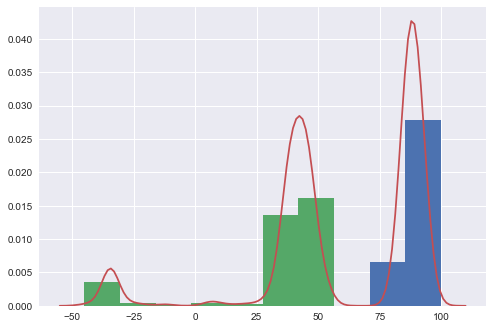

In [25]:
plt.figure()
plt.hist([eda.points, eda.Latitude], histtype='barstacked', density=True);
v3 = np.concatenate(([eda.points, eda.Latitude]))
sns.kdeplot(v3);

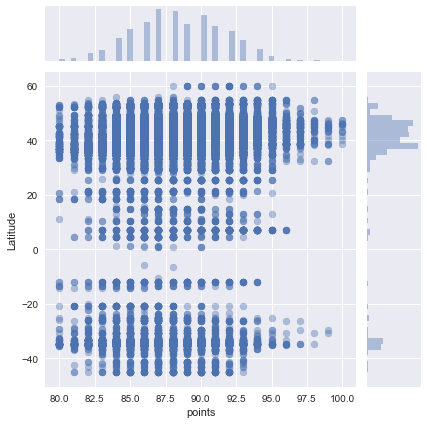

In [26]:
sns.jointplot(eda.points,eda.Latitude, alpha=0.4);

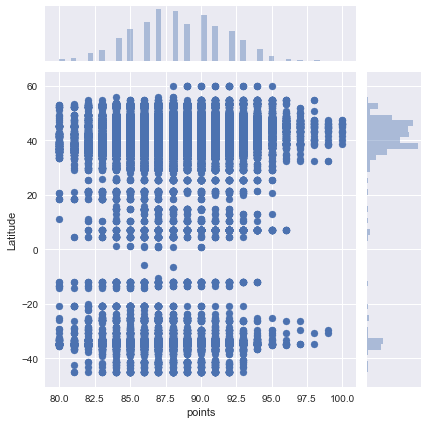

In [38]:
sns.jointplot(eda.points,eda.Latitude, alpha=0.4);

# Histrogramas

### Latitudes Vs. Puntajes

Se utilizará, basandose en la ley de pareto, las calificaciones del 20% de los mejores vinos. Para esto, como los vinos son calificados de 80 a 100, el 20% es el puntaje de 96 a 100. Con esta información, separamos las diferentes zonas de Latitudes con respecto a los trópicos, los cuales determinan las zonas de calor.

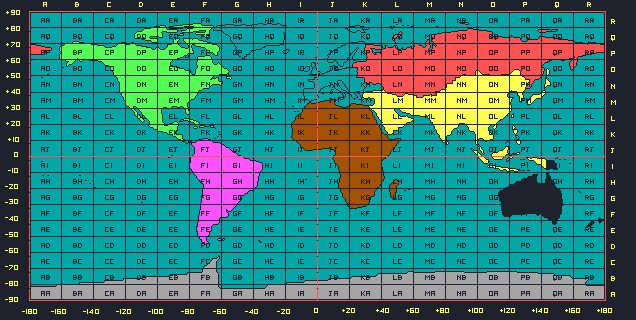

Con esto, realizamos el cruce gráfico de estas zonas, buscando ciertas conclusiones sobre las zonas geográficas contra la calidad de los vinos. No se graficarán datos sobre los círculos árticos y antárticos ya que no se encuentra información en nuestra base de datos de algún vino en estas zonas 

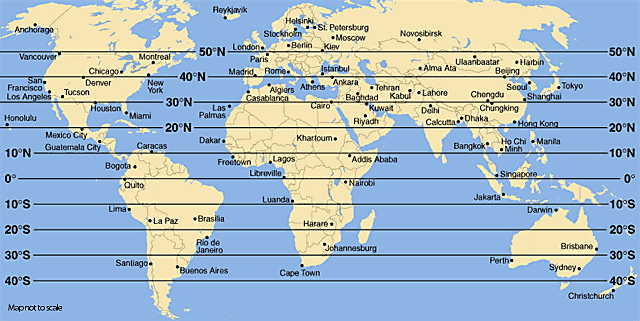

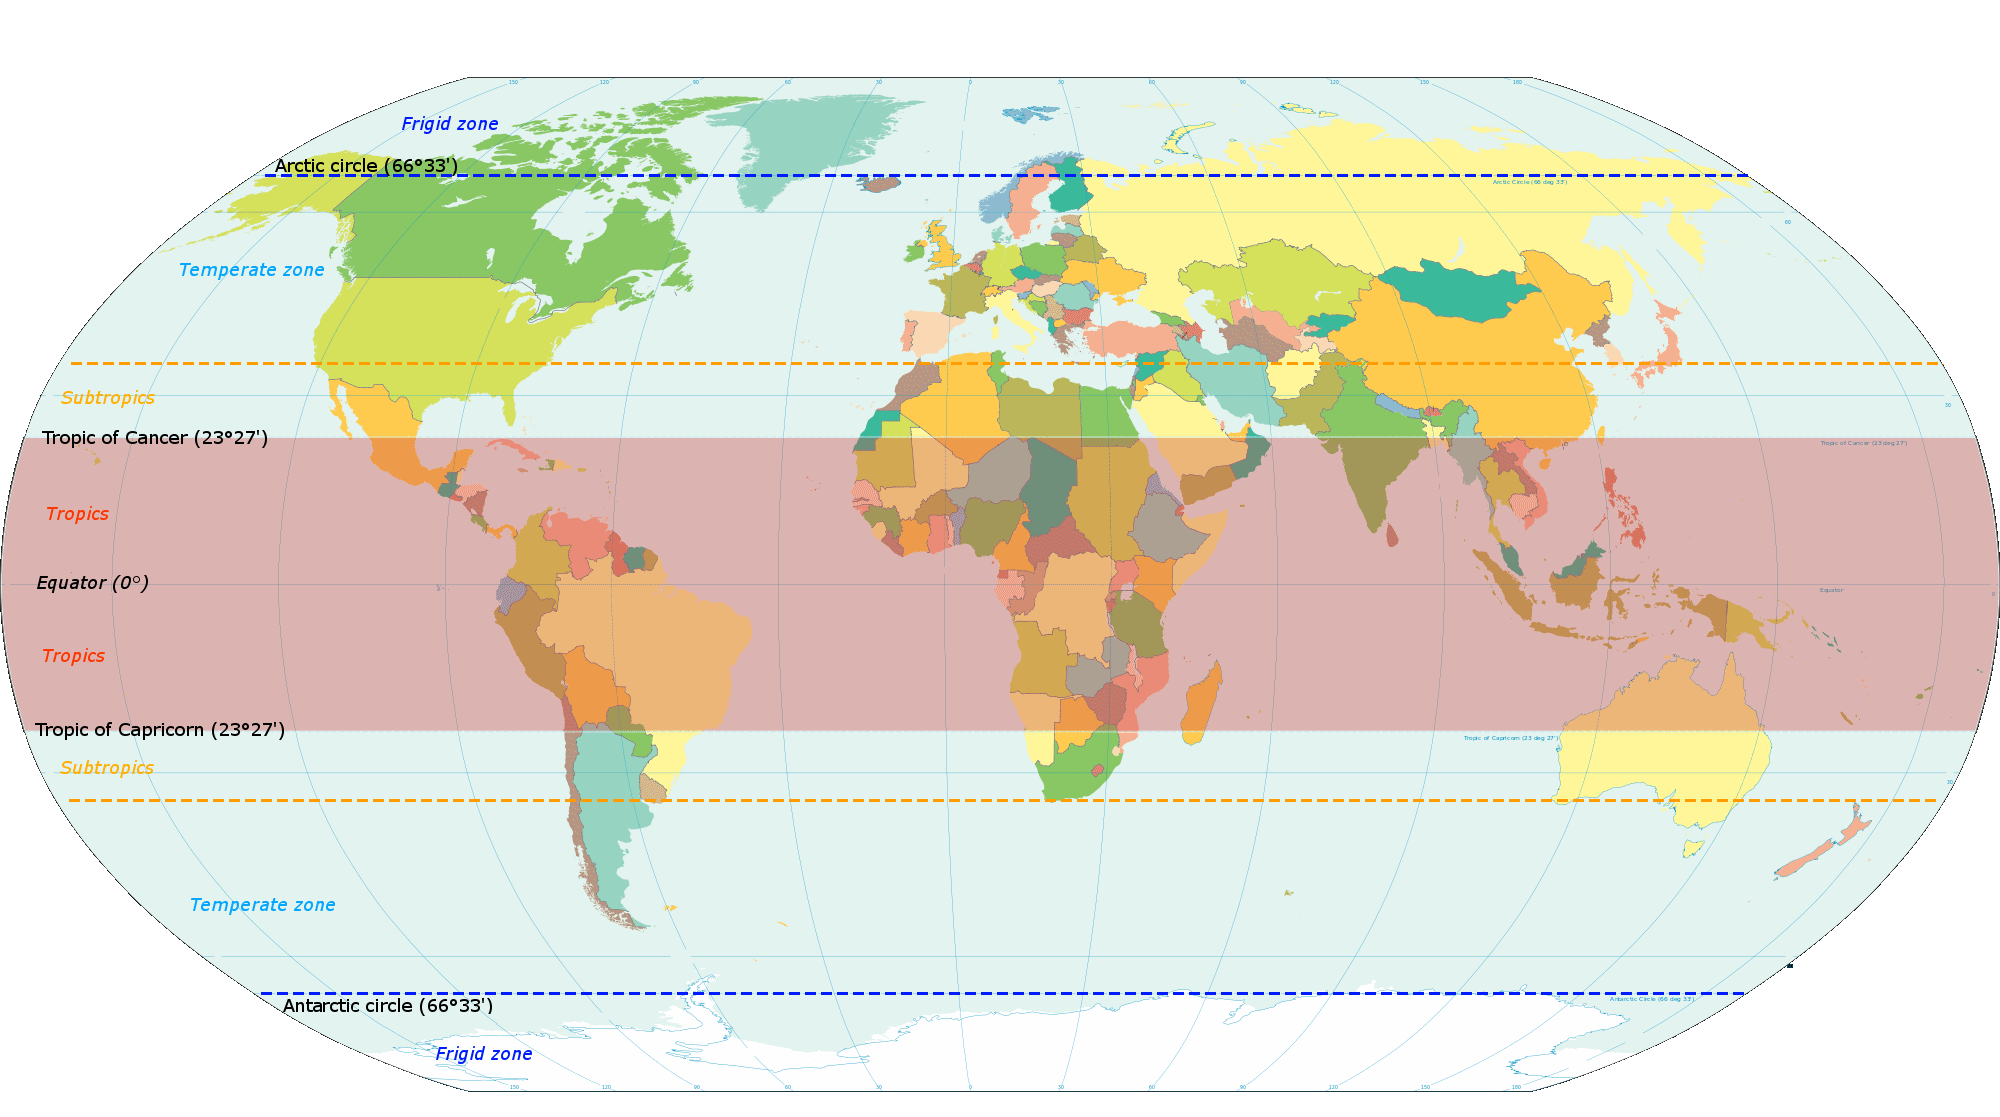

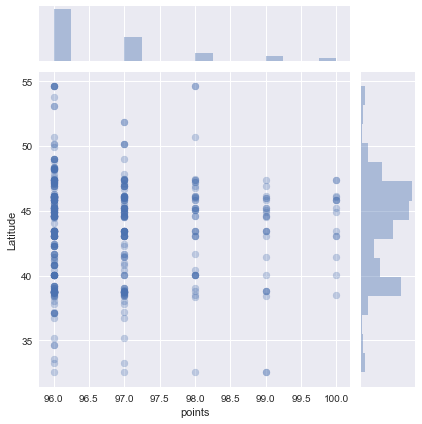

In [51]:
#Trópico de Cancer
df = eda[(eda.points>95) & (eda.Latitude>23.5)]
sns.jointplot(df.points,df.Latitude, alpha=0.3);

**Conclusion** Se encuentra una mayor concentración de vinos de buena calidad en las latitudes cercanas a los 39°, 45°, 46° y 47°; esta característica tambien se puede percibir ligeramente con los vinos de puntaje 99 y 100.

country                                        description  points  \
43564      US  This is the most expensive Pinot Noir Foxen ha...      96   
43801      US  From the southernmost part of the appellation ...      96   
43892      US  Huge rich white Burgundy style Chardonnay. Has...      96   
43982      US  An exotic Pinot Noir feral and exciting in its...      96   
44024      US  This wine is as fine as anything from Santa Ri...      96   

       price taster_name     variety   winery  Year           region  \
43564   85.0     Anonimo  Pinot Noir    Foxen  2010  Sta. Rita Hills   
43801   50.0     Anonimo  Pinot Noir  Babcock  2009  Sta. Rita Hills   
43892   38.0     Anonimo  Chardonnay     Ojai  2007  Sta. Rita Hills   
43982   44.0     Anonimo  Pinot Noir  Samsara  2008  Sta. Rita Hills   
44024   56.0     Anonimo  Pinot Noir     Ojai  2005  Sta. Rita Hills   

       Latitude   Longitude  Lat_x  Long_x  temp_anual  temp_max_anual  \
43564  7.117597  125.642556   7.25  125.75       27.14           31.60   
43801  7.117597  125.642556   7.25  125.75       27.31           31.68   
43892  7.117597  125.642556   7.25  125.75       27.37           31.76   
43982  7.117597  125.642556   7.25  125.75       27.15           31.45   
44024  7.117597  125.642556   7.25  125.75       27.34           31.90   

       temp_min_anual  pre_anual  etp_anual  
43564           22.72     2500.4       1203  
43801           23.00     2128.6       1185  
43892           23.03     2194.2       1197  
43982           22.90     2560.7       1182  
44024           22.80     2242.2       1206

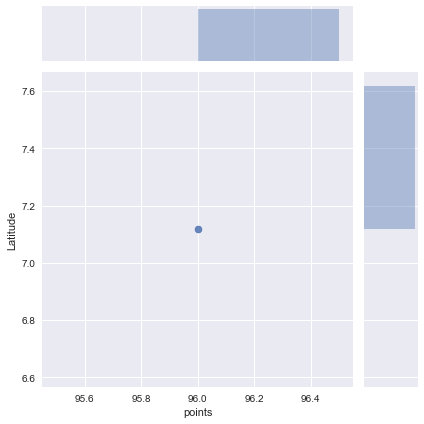

In [54]:
#Ecuador Norte
df = eda[(eda.points>95) & (eda.Latitude<23.5) & (eda.Latitude>0)]
sns.jointplot(df.points,df.Latitude, alpha=0.3);
df

**Conclusion** Solo se encuentran cinco vinos en esta zona con un puntaje de 96. Esto muestra que la zona del Ecuador Norte no posee muy buenas zonas para sembrar vinos, pero resulta curioso que de estos 6 vinos, 5 corresponden a la cepa Pinot Noir.

Empty DataFrame
Columns: [country, description, points, price, taster_name, variety, winery, Year, region, Latitude, Longitude, Lat_x, Long_x, temp_anual, temp_max_anual, temp_min_anual, pre_anual, etp_anual]
Index: []

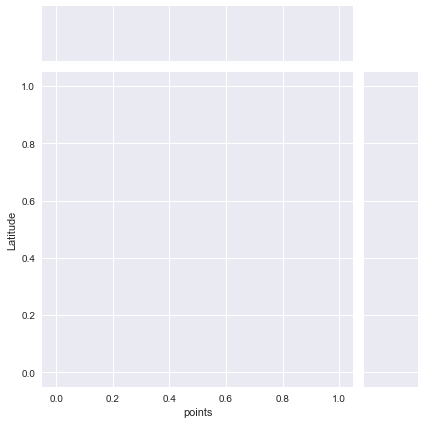

In [55]:
#Ecuador Sur
df = eda[(eda.points>95) & (eda.Latitude>-23.5) & (eda.Latitude<0)]
sns.jointplot(df.points,df.Latitude, alpha=0.3);
df

**Conclusion** No se encuentra ningún vino en esta zona.

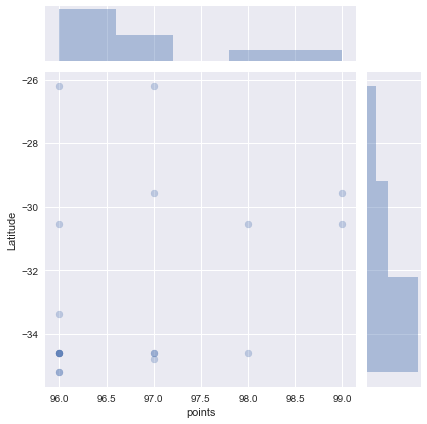

In [57]:
#Trópico de Capricornio
df = eda[(eda.points>95) & (eda.Latitude<-23.5) & (eda.Latitude>-66.5)]
sns.jointplot(df.points,df.Latitude, alpha=0.3);

**Conclusion** En este gráfico se encuentra un número bajo de calificaciones, debido a que la cantridad de muestras es mucho mayor en la zona norta que en la zona sur. En este caso, se ve que los mejores vinos se encuentran alrededor de los -29°/-31° y hacia el sur.

**Sería también correcto analizar las zonas con peores vinos? Creería que no ya que no es el objetivo de nuestro análisis**

### Longitudes Vs. Puntaje

Se realiza el análisis análogo al de Latitudes, esta vez no se tienen zonas para los meridianos, por lo que se separarán en las siguientes zonas:
1. Este USA (EU): -160° a -100°
2. Oeste USA y LATAM (OUL): -100° a -20°
3. Este Europa y Africa (EEA): -20° a 30°
4. Oeste Europa y Emiratos Árabes (OEEA): 30° a 70°
5. Asia y Oceanía (AO): 70° a 180°

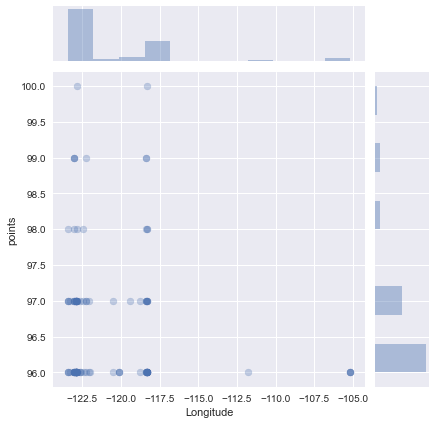

In [61]:
#Zona EU
df = eda[(eda.points>95) & (eda.Longitude>-160) & (eda.Longitude<=-100)]
sns.jointplot(df.Longitude,df.points, alpha=0.3);

**Conclusion** Los mejores vinos se dan en las Longitudes alrededor de los -122° y -117°, que comprende la región de California.

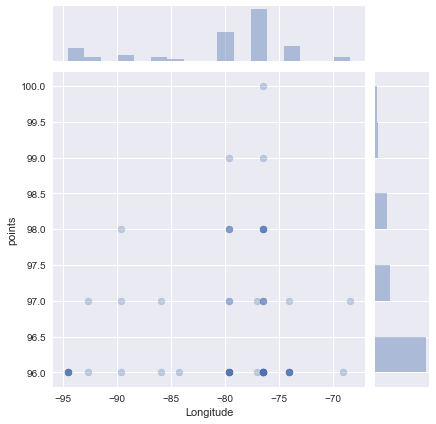

In [62]:
#Zona OUL
df = eda[(eda.points>95) & (eda.Longitude>-100) & (eda.Longitude<=-20)]
sns.jointplot(df.Longitude,df.points, alpha=0.3);

**Conclusion** Los mejores vinos se dan en múltiples longitudes, con concentración entre los -80° y -74°

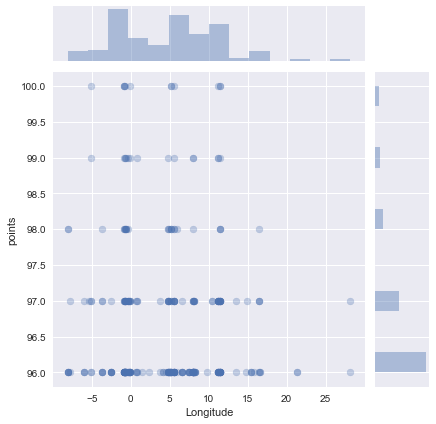

In [63]:
#Zona EEA
df = eda[(eda.points>95) & (eda.Longitude>-20) & (eda.Longitude<=30)]
sns.jointplot(df.Longitude,df.points, alpha=0.3);

**Conclusion** Los mejores vinos se encuentran distribuidos, con una mayor concentración entre los -7° y 12°, la cual es la zona comprendida para España, Francia e Italia.

country                                        description  points  \
47725      US  This is nearly perfect a massive monumental wi...      99   
47726      US  A monumental Cabernet that succeeds on every l...      97   

       price taster_name             variety     winery  Year  \
47725  100.0     Anonimo  Cabernet Sauvignon  Trefethen  2005   
47726   50.0     Anonimo  Cabernet Sauvignon  Trefethen  2005   

                   region  Latitude  Longitude  Lat_x  Long_x  temp_anual  \
47725  Oak Knoll District -29.58241   30.28094 -29.75   30.25       17.19   
47726  Oak Knoll District -29.58241   30.28094 -29.75   30.25       17.19   

       temp_max_anual  temp_min_anual  pre_anual  etp_anual  
47725           23.77           10.65      664.6       1098  
47726           23.77           10.65      664.6       1098

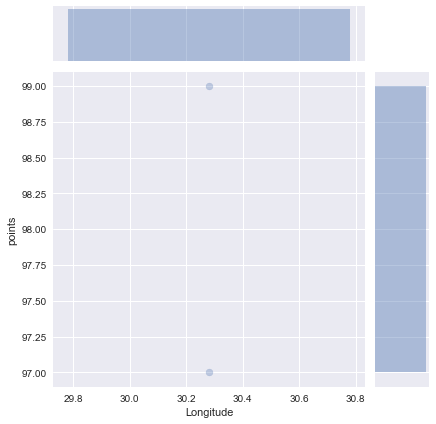

In [65]:
#Zona OEEA
df = eda[(eda.points>95) & (eda.Longitude>30) & (eda.Longitude<=70)]
sns.jointplot(df.Longitude,df.points, alpha=0.3);
df

**Conclusion** Se encontró un dato atípico de la distribución, ya que este vino pertenece a Estados Unidos.

country                                        description  points  \
28083  Australia  A throwback to the monster Shiraz style of old...      96   
28094  Australia  This has all the size and weight you've come t...      98   
28156  Australia  This inky embryonic wine deserves to be cellar...      99   
28945  Australia  This full-bodied muscular Shiraz is built for ...      96   
29069  Australia  D'Arenberg's lineup of single-vineyard Shiraze...      96   
29226  Australia  This prodigious wine showcases Barossa's abili...      98   
29268  Australia  RWT unromantically derived from “Red Wine Tria...      96   
29359  Australia  Winemaker Dave Powell is no longer with Torbre...      96   
29388  Australia  Despite this wine's weight and richness it ret...      96   
29416  Australia  If Standish's Relic is the feminine side of Sh...      96   
29458  Australia  You may have to scour the country to secure so...      97   
29462  Australia  RunRig is always complex and the 2012 doesn't ...      97   
29468  Australia  Thorn Clarke has taken its Shiraz to a new lev...      96   
31635      Italy  This is an elegant Nebbiolo-based wine and arg...      99   
31636      Italy  Always a standout among Gaja's five single-vin...      99   
31647      Italy  Sperss the name is inspired by the local word ...      98   
31649      Italy  Conteisa is a Barolo-inspired wine from Angelo...      97   
31716      Italy  There's always something magical about Gaja's ...      96   
43564         US  This is the most expensive Pinot Noir Foxen ha...      96   
43801         US  From the southernmost part of the appellation ...      96   
43892         US  Huge rich white Burgundy style Chardonnay. Has...      96   
43982         US  An exotic Pinot Noir feral and exciting in its...      96   
44024         US  This wine is as fine as anything from Santa Ri...      96   

       price     taster_name          variety        winery  Year  \
28083  500.0  Joe Czerwinski           Shiraz      Penfolds  2004   
28094  850.0  Joe Czerwinski           Shiraz      Penfolds  2008   
28156  850.0  Joe Czerwinski           Shiraz      Penfolds  2010   
28945  120.0  Joe Czerwinski           Shiraz  Kay Brothers  2012   
29069   85.0  Joe Czerwinski           Shiraz    D'Arenberg  2010   
29226  135.0  Joe Czerwinski           Shiraz      Standish  2006   
29268  150.0  Joe Czerwinski           Shiraz      Penfolds  2009   
29359  225.0  Joe Czerwinski  Shiraz-Viognier      Torbreck  2007   
29388  110.0  Joe Czerwinski           Shiraz      Glaetzer  2010   
29416  135.0  Joe Czerwinski           Shiraz      Standish  2005   
29458   95.0  Joe Czerwinski           Shiraz      Standish  2012   
29462  225.0  Joe Czerwinski  Shiraz-Viognier      Torbreck  2012   
29468   89.0  Joe Czerwinski           Shiraz  Thorn Clarke  2012   
31635  440.0         Anonimo         Nebbiolo          Gaja  2007   
31636  440.0         Anonimo         Nebbiolo          Gaja  2007   
31647  255.0         Anonimo         Nebbiolo          Gaja  2006   
31649  215.0         Anonimo         Nebbiolo          Gaja  2006   
31716  495.0         Anonimo         Nebbiolo          Gaja  2009   
43564   85.0         Anonimo       Pinot Noir         Foxen  2010   
43801   50.0         Anonimo       Pinot Noir       Babcock  2009   
43892   38.0         Anonimo       Chardonnay          Ojai  2007   
43982   44.0         Anonimo       Pinot Noir       Samsara  2008   
44024   56.0         Anonimo       Pinot Noir          Ojai  2005   

                region   Latitude   Longitude  Lat_x  Long_x  temp_anual  \
28083  South Australia -30.534366  135.630121 -30.75  135.75       19.79   
28094  South Australia -30.534366  135.630121 -30.75  135.75       19.44   
28156  South Australia -30.534366  135.630121 -30.75  135.75       19.10   
28945     McLaren Vale -35.217262  138.541700 -35.25  138.75       15.18   
29069     McLaren Vale -35.217262  138.541700 -35.25  138.75       14.78   

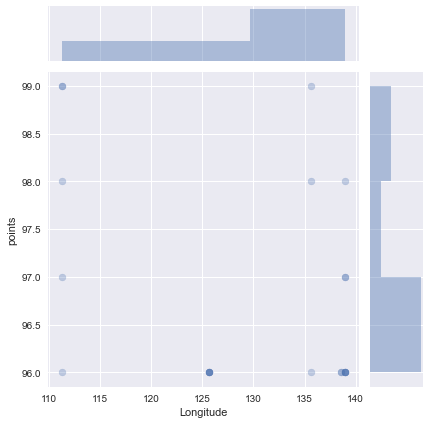

In [67]:
#Zona AO
df = eda[(eda.points>95) & (eda.Longitude>70) & (eda.Longitude<180)]
sns.jointplot(df.Longitude,df.points, alpha=0.3);
df

También se encontraron datos atípicos

In [69]:
from geopy import Nominatim
from geopy.extra.rate_limiter import RateLimiter

geolocator = Nominatim(user_agent="geoapiExercises")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1.5)

In [70]:
ladd1 = "Oak Knoll District"
print("Location address:",ladd1)
location = geolocator.geocode(ladd1)
print("Latitude and Longitude of the said address:")
print((location.latitude, location.longitude))

Location address: Oak Knoll District
Latitude and Longitude of the said address:
(41.2367237, -80.8150831)


Test